# 一个简单的最小二乘法拟合含参数的一元二次方程示例
关键词
- 一元二次方程
- 求解参数

In [1]:
import arviz as az
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

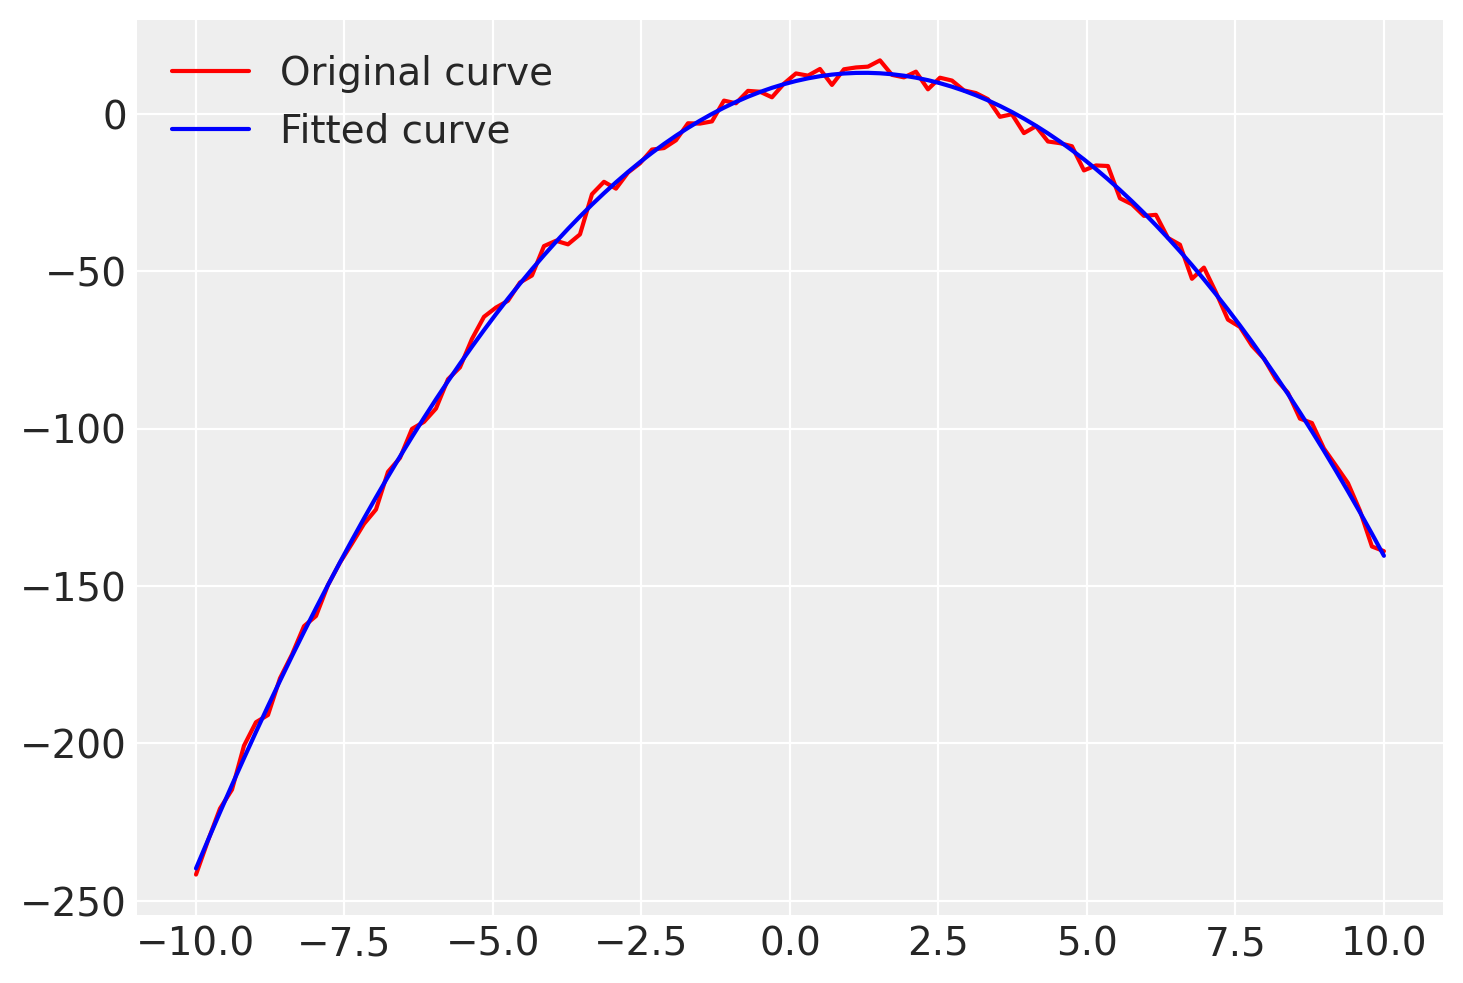

pred [-2.00064746  4.96721739  9.9936069 ]
GT [-2, 5, 10]


In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
 
def Fun(p,x):                        # 定义拟合函数形式
    a1,a2,a3 = p
    return a1*x**2+a2*x+a3

def error (p,x,y,c):                    # 拟合残差
    a1,a2,a3 = p
    res = a1*x**2+a2*x+a3 - y
    return res

def main():
    x = np.linspace(-10,10,100)  # 创建时间序列
    p_value = [-2,5,10] # 原始数据的参数
    noise = np.random.randn(len(x))  # 创建随机噪声
    y = Fun(p_value,x)+noise*2 # 加上噪声的序列
    p0 = [0.1,-0.01,100] # 拟合的初始参数设置
    c = 3
    
    para =leastsq(error, p0, args=(x,y,c)) # 进行拟合
    y_fitted = Fun (para[0],x) # 画出拟合后的曲线
    plt.figure
    plt.plot(x,y,'r', label = 'Original curve')
    plt.plot(x,y_fitted,'-b', label ='Fitted curve')
    plt.legend()
    plt.show()
    print ("pred", para[0])
    print ("GT", p_value)
main()